# Python Crash Course (Pandas for data analysis)

Audience: M2 Data & IA.
Chapter 1 - Introduction to Machine learning.
Section 3: Pandas for data analysis.

This notebook will just go through the basic topics in order:

* Introduction to Pandas
* Series
* DataFrames
* Missing Data
* GroupBy
* Merging,Joining,and Concatenating
* Operations
* Data Input and Output

## What is Pandas?

Pandas is a Python library used for working with data sets.

1. It has functions for analyzing, cleaning, exploring, and manipulating data.

2. Pandas allows us to analyze big data and make conclusions based on statistical theories.

3. Pandas can clean messy data sets, and make them readable and relevant.

4. Has built-in visualization features.

Codebase at https://github.com/pandas-dev/pandas

## Installation

1. Using anaconda prompt/python terminal: pip install pandas or conda install pandas
2. using %pip or %conda magic: %pip install pandas
3. Google Colab !pip install pandas

## Importing

Use the following improt convention

In [1]:
import pandas as pd 

## Series

The first main data type we will learn about for pandas is the Series data type. 

A Series is very similar to a NumPy array (in fact it is built on top of the NumPy array object). 

What differentiates the NumPy array from a Series, is that a Series can have axis labels, meaning it can be indexed by a label, instead of just a number location. Basically, a Pandas Series is like a column in a table.

It also doesn't need to hold numeric data, it can hold any arbitrary Python Object.

In [2]:
# Create a simple Pandas Series from a list
py_list = [1, 2, 3, 4]

In [4]:
list_series = pd.Series(py_list)

In [7]:
list_series 

0    1
1    2
2    3
3    4
dtype: int64

**With the index argument, we can create custom labels (improves readability).**

#### Labels 

First value has index 0, second value has index 1 etc.

This label can be used to access a specified value.

In [9]:
list_series = pd.Series(py_list, index=["A", "B", "C", "D"])

In [11]:
list_series

A    1
B    2
C    3
D    4
dtype: int64

In [13]:
list_series["A"]

1

In [14]:
# Creating from dictionary.
py_dict = {'a':1,'b':2,'c':3, 'd':4}

In [15]:
pd.Series(py_dict)

a    1
b    2
c    3
d    4
dtype: int64

#### The key to using a Series is understanding its index. 

Pandas makes use of these index names or numbers by allowing for fast look ups of information (works like a hash table or dictionary).

In [16]:
# Always adapt your index, to your data.

calories = {"day1": 420, "day2": 380, "day3": 390}


In [18]:
cal_df = pd.Series(calories)

In [19]:
cal_df["day1"]

420

### DataFrames

Data sets in Pandas are usually multi-dimensional tables, called DataFrames.

Series is like a column, a DataFrame is the whole table.

In [20]:
# A DataFrame is a bunch of Series objects put together to share the same index. 

calories_data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

In [21]:
pd.DataFrame(calories_data)

,calories,duration
0,420,50
1,380,40
2,390,45


In [23]:
# We can specify our own index and columns.
from numpy.random import randn
# Return a sample (or samples) from the standard normal distribution. 

In [ ]:
# Create a dataframe from 2D array of 5 elements, having 4 random numbers.

In [25]:
custom_df = pd.DataFrame(randn(5,4), index=["A", "B", "C", "D", "E"], columns=["X", "Y", "W", "Z"])

In [26]:
print(custom_df)

          X         Y         W         Z
A  2.400965  1.349086 -1.581428 -1.055400
B -0.972373  1.695248  0.185498 -0.474638
C -0.826220 -0.912224  0.625059 -1.387118
D  0.128510  1.430445  1.042020 -0.046457
E -0.585639 -0.385141 -1.003458  0.422770


#### Selection and Indexing

As you can see from the result above, the DataFrame is like a table with rows and columns.

#### Locate Row

Pandas use the loc attribute to return one or more specified row(s)

In [27]:
# Return row "B" with all columns.
custom_df.loc["B"]

X   -0.972373
Y    1.695248
W    0.185498
Z   -0.474638
Name: B, dtype: float64

In [28]:
# Return row "B" and "C" with all columns.
custom_df.loc[["B", "C"]]

,X,Y,W,Z
B,-0.972373,1.695248,0.185498,-0.474638
C,-0.826220,-0.912224,0.625059,-1.387118


In [29]:
# Return row "C"
custom_df.loc["C"]

X   -0.826220
Y   -0.912224
W    0.625059
Z   -1.387118
Name: C, dtype: float64

In [31]:
# Select subset of rows (A, B) and columns (X, Y).
custom_df.loc[["A", "B"], ["X","Y"]]

,X,Y
A,2.400965,1.349086
B,-0.972373,1.695248


In [34]:
# Select subset of rows (A) and columns (X, Y, W).
custom_df.loc[["A"], ["X","Y", "W"]]

,X,Y,W
A,2.400965,1.349086,-1.581428


In [37]:
# Select value of A, W
custom_df.loc["A"].loc["W"]

-1.5814278680381824

#### Locate Column

Pandas use the square bracets "[]" to return one or more specified column(s)

In [39]:
custom_df

,X,Y,W,Z
A,2.400965,1.349086,-1.581428,-1.055400
B,-0.972373,1.695248,0.185498,-0.474638
C,-0.826220,-0.912224,0.625059,-1.387118
D,0.128510,1.430445,1.042020,-0.046457
E,-0.585639,-0.385141,-1.003458,0.422770


In [38]:
# Return column "W".
custom_df["W"]

A   -1.581428
B    0.185498
C    0.625059
D    1.042020
E   -1.003458
Name: W, dtype: float64

In [40]:
# Return columns "W" and "X".
custom_df[["W", "X"]]

,W,X
A,-1.581428,2.400965
B,0.185498,-0.972373
C,0.625059,-0.826220
D,1.042020,0.128510
E,-1.003458,-0.585639


#### Creating a Column.

In [41]:
# Adding a new column to an existing data frame.
custom_df["V"] = custom_df["W"] + custom_df["X"]

In [44]:
custom_df

,X,Y,W,Z,V
A,2.400965,1.349086,-1.581428,-1.055400,0.819537
B,-0.972373,1.695248,0.185498,-0.474638,-0.786875
C,-0.826220,-0.912224,0.625059,-1.387118,-0.201160
D,0.128510,1.430445,1.042020,-0.046457,1.170530
E,-0.585639,-0.385141,-1.003458,0.422770,-1.589098


#### Column Deletion

In [ ]:
# Columns can be deleted or popped.

In [47]:
custom_df.drop("V", axis=1, inplace=True) #default set to 0 ==> Rows / 1 == Columns.

In [ ]:
# We can remove rows. 

In [49]:
custom_df.drop("A")

,X,Y,W,Z
B,-0.972373,1.695248,0.185498,-0.474638
C,-0.826220,-0.912224,0.625059,-1.387118
D,0.128510,1.430445,1.042020,-0.046457
E,-0.585639,-0.385141,-1.003458,0.422770


#### Index 

Let's discuss some more features of indexing, including resetting the index or setting it something else.

In [51]:
custom_df # current index is set to A B C etc..

,X,Y,W,Z
A,2.400965,1.349086,-1.581428,-1.055400
B,-0.972373,1.695248,0.185498,-0.474638
C,-0.826220,-0.912224,0.625059,-1.387118
D,0.128510,1.430445,1.042020,-0.046457
E,-0.585639,-0.385141,-1.003458,0.422770


In [53]:
# Reset to default index (0,1...n).
df_example = custom_df.reset_index()

In [54]:
df_example

,index,X,Y,W,Z
0,A,2.400965,1.349086,-1.581428,-1.055400
1,B,-0.972373,1.695248,0.185498,-0.474638
2,C,-0.826220,-0.912224,0.625059,-1.387118
3,D,0.128510,1.430445,1.042020,-0.046457
4,E,-0.585639,-0.385141,-1.003458,0.422770


In [55]:
# Add new to column to dataframe.
df_example['Cities'] = ['Paris', 'Lille', 'Nice', 'Lyon', 'Grenoble']

In [56]:
df_example

,index,X,Y,W,Z,Cities
0,A,2.400965,1.349086,-1.581428,-1.055400,Paris
1,B,-0.972373,1.695248,0.185498,-0.474638,Lille
2,C,-0.826220,-0.912224,0.625059,-1.387118,Nice
3,D,0.128510,1.430445,1.042020,-0.046457,Lyon
4,E,-0.585639,-0.385141,-1.003458,0.422770,Grenoble


In [ ]:
# We can assign the newly created column as an index.

In [59]:
df_example.set_index("Cities", inplace=True) # Specify inplace = True

In [60]:
df_example

,index,X,Y,W,Z
Cities,,,,,
Paris,A,2.400965,1.349086,-1.581428,-1.055400
Lille,B,-0.972373,1.695248,0.185498,-0.474638
Nice,C,-0.826220,-0.912224,0.625059,-1.387118
Lyon,D,0.128510,1.430445,1.042020,-0.046457
Grenoble,E,-0.585639,-0.385141,-1.003458,0.422770


In [ ]:
# Select Data related to 'Paris'

In [61]:
df_example.loc["Paris"]

index           A
X        2.400965
Y        1.349086
W       -1.581428
Z         -1.0554
Name: Paris, dtype: object

In [63]:
df_example.reset_index(inplace=True)

In [64]:
df_example

,Cities,index,X,Y,W,Z
0,Paris,A,2.400965,1.349086,-1.581428,-1.055400
1,Lille,B,-0.972373,1.695248,0.185498,-0.474638
2,Nice,C,-0.826220,-0.912224,0.625059,-1.387118
3,Lyon,D,0.128510,1.430445,1.042020,-0.046457
4,Grenoble,E,-0.585639,-0.385141,-1.003458,0.422770


#### Conditional Selection

An important feature of pandas is conditional selection using bracket notation, very similar to numpy.

In [1]:
# Drop newly added column
#df_example.drop("index", axis=1, inplace=True)

In [70]:
df_example.drop("Cities", axis=1, inplace=True)

In [73]:
# Select Data with positive values
df_example[df_example > 0 ]

,X,Y,W,Z
0,2.400965,1.349086,NaN,NaN
1,NaN,1.695248,0.185498,NaN
2,NaN,NaN,0.625059,NaN
3,0.128510,1.430445,1.042020,NaN
4,NaN,NaN,NaN,0.42277


In [74]:
# Filter negative values from column "W"
df_example[df_example["W"] > 0 ]

,X,Y,W,Z
1,-0.972373,1.695248,0.185498,-0.474638
2,-0.826220,-0.912224,0.625059,-1.387118
3,0.128510,1.430445,1.042020,-0.046457


In [76]:
# Filter negative values from column "W" and only display column 'Y'.
df_example[df_example["W"] > 0 ]['Y']

1    1.695248
2   -0.912224
3    1.430445
Name: Y, dtype: float64

In [77]:
# Filter negative values from column "W" and only display column 'Y' and 'X'.
df_example[df_example["W"] > 0 ][['Y', 'X']]

,Y,X
1,1.695248,-0.972373
2,-0.912224,-0.826220
3,1.430445,0.128510


In [80]:
# Filter negative values from column "W" and column "Y".
df_example[(df_example["W"] > 0) & (df_example["Y"] > 0) ] # & = AND, | = OR, ~ Means NOT

,X,Y,W,Z
1,-0.972373,1.695248,0.185498,-0.474638
3,0.128510,1.430445,1.042020,-0.046457


In [82]:
# Filter negative values from column "W" and column "Y" and output them into an array, then simple list.
df_example[(df_example["W"] > 0) & (df_example["Y"] > 0)].values

array([[-0.97237301,  1.69524779,  0.18549798, -0.47463827],
       [ 0.12851002,  1.43044462,  1.04202005, -0.04645702]])

In [83]:
df_example[(df_example["W"] > 0) & (df_example["Y"] > 0)].to_numpy()
df[(df["metier"]=="datascience" | df["metier"]=="datascience")]

array([[-0.97237301,  1.69524779,  0.18549798, -0.47463827],
       [ 0.12851002,  1.43044462,  1.04202005, -0.04645702]])

In [86]:
# then simple list
df_example[(df_example["W"] > 0) & (df_example["Y"] > 0)].values.tolist()

[[-0.9723730102557515,
  1.695247794103958,
  0.18549797925961783,
  -0.4746382652239042],
 [0.12851001625443156,
  1.430444622236239,
  1.0420200509185416,
  -0.04645702469158241]]

#### How to work with missing values

When exploring data, you’ll most likely encounter missing or null values (NaN = Not a Number), which are essentially placeholders for non-existent values. 

Most commonly you'll see Python's None or NumPy's np.nan, each of which are handled differently in some situations.

There are two options in dealing with nulls:

1. Get rid of rows or columns with nulls:

    1.1 In Listwise deletion entire rows(which hold the missing values) are deleted. It is not preferred if the size of the dataset is small as it removes entire rows. If we eliminate rows with missing data then the dataset becomes very short and the machine learning model will not give good outcomes on a small dataset.
    
    1.2 Dropping complete columns : If a column holds a lot of missing values, say more than 80%, and the feature is not meaningful, that time we can drop the entire column.
    
    
2. Replace nulls with non-null values, a technique known as imputation: The missing values can be imputed in many ways depending upon the nature of the data and its problem. 

    2.1 Constant value: Replaces the missing values with either zero or any constant value.
    
    2.2 Statistics: "Mean" if data is numeric and not skewed, "Median" if data is numeric and skewed and "Most Frequent" if data is categorical or numeric.
    
    2.3 Using Machine learning algorithms (example: K Nearest Neighbor imputation). We'll discuss this later in the course.

Tip: Skewed data is data following Gaussian distribution.

In [90]:
# Select Data with positive values 
df_example_nulls = df_example[df_example > 0 ]

<AxesSubplot: ylabel='Density'>

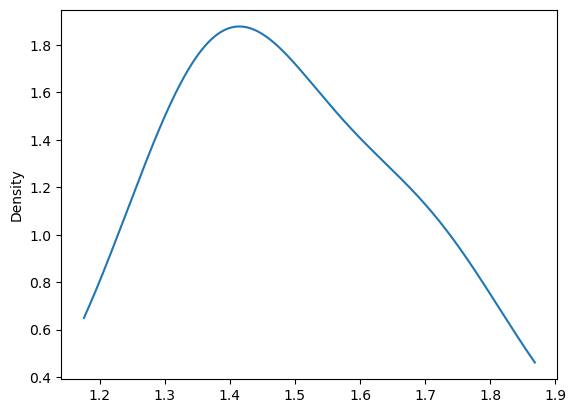

In [91]:
# We use the density to describe the randomly sampled data with an unknown distribution.
df_example_nulls["Y"].plot.kde()
# We Can also check the histogram to see what distribution it follows. 

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://miro.medium.com/max/720/1*ERA6haT0PzzYtV2Xi_cjaA.png")

**Tip: use Python fitter to search from 80 different data distributions and provide you the best one.**

#### Check for Missing Values

To make detecting missing values easier (and across different array dtypes), Pandas provides the isnull() and notnull() functions, which are also methods on Series and DataFrame objects

In [93]:
df_example_nulls

,X,Y,W,Z
0,2.400965,1.349086,NaN,NaN
1,NaN,1.695248,0.185498,NaN
2,NaN,NaN,0.625059,NaN
3,0.128510,1.430445,1.042020,NaN
4,NaN,NaN,NaN,0.42277


In [92]:
# Check if there are Nulls on all the dataframe.
df_example_nulls.isnull()

,X,Y,W,Z
0,False,False,True,True
1,True,False,False,True
2,True,True,False,True
3,False,False,False,True
4,True,True,True,False


In [94]:
# on specific columns ?
df_example_nulls["Z"].isnull()

0     True
1     True
2     True
3     True
4    False
Name: Z, dtype: bool

##### Calculations with Missing Data

1. When summing data, NA will be treated as Zero
2. If the data are all NA, then the result will be NA

In [95]:
# Find sum of column "X"
df_example_nulls["Z"].sum()

0.42276990140320386

In [96]:
# Find Mean of column "X"
df_example_nulls["X"].mean()

1.2647376474594616

In [97]:
# Find Median of column "X"
df_example_nulls["X"].median()

1.2647376474594616

In [98]:
# We can obtain an overview of our data using describe (Interquantile range, standard deviation, etc).
df_example_nulls.describe()

,X,Y,W,Z
count,2.000000,3.000000,3.000000,1.00000
mean,1.264738,1.491593,0.617526,0.42277
std,1.606869,0.181001,0.428311,NaN
min,0.128510,1.349086,0.185498,0.42277
25%,0.696624,1.389765,0.405279,0.42277
50%,1.264738,1.430445,0.625059,0.42277
75%,1.832851,1.562846,0.833540,0.42277
max,2.400965,1.695248,1.042020,0.42277


In [101]:
df_example_nulls

,X,Y,W,Z
0,2.400965,1.349086,NaN,NaN
1,NaN,1.695248,0.185498,NaN
2,NaN,NaN,0.625059,NaN
3,0.128510,1.430445,1.042020,NaN
4,NaN,NaN,NaN,0.42277


In [99]:
# drop null values (# row wise.)
df_example_nulls.dropna(axis=0)

,X,Y,W,Z


In [100]:
# drop null values (# column wise.)
df_example_nulls.dropna(axis=1)

""
0
1
2
3
4


We have no data because the default method of dropping nulls in pandas is if there are any null values in either row/column.

In [102]:
# only drop data when the whole row is null.
df_example_nulls.dropna(how='all', axis=1)

,X,Y,W,Z
0,2.400965,1.349086,NaN,NaN
1,NaN,1.695248,0.185498,NaN
2,NaN,NaN,0.625059,NaN
3,0.128510,1.430445,1.042020,NaN
4,NaN,NaN,NaN,0.42277


**Imputation with constant value.**

In [107]:
# Fill nulls in column Y with median values.

# first, retreive median of Y.
y_med = df_example_nulls["Y"].median()
# then, replace NaN with median.
df_example_nulls["Y"][.fillna(y_med, inplace=True)

In [104]:
y_med

1.430444622236239

In [108]:
df_example_nulls

,X,Y,W,Z
0,2.400965,1.349086,NaN,NaN
1,NaN,1.695248,0.185498,NaN
2,NaN,1.430445,0.625059,NaN
3,0.128510,1.430445,1.042020,NaN
4,NaN,1.430445,NaN,0.42277


In [109]:
#replace whole dataframe with constant value ("Empty") for NaNs.
df_example_nulls.fillna("Empty")

,X,Y,W,Z
0,2.400965,1.349086,Empty,Empty
1,Empty,1.695248,0.185498,Empty
2,Empty,1.430445,0.625059,Empty
3,0.12851,1.430445,1.04202,Empty
4,Empty,1.430445,Empty,0.42277


#### Some 'theory': the groupby operation (split-apply-combine)

The "group by" concept: we want to apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

1. Splitting the data into groups based on some criteria
2. Applying a function to each group independently
3. Combining the results into a data structure

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i0.wp.com/lifewithdata.com/wp-content/uploads/2022/02/group2.jpeg?resize=798%2C419&ssl=1")

In [110]:
# use the following example.
group_by_df = pd.DataFrame({'key':['A','B','C','A','B','C'],
                   'data': [1, 2, 3, 4, 5, 6]})

In [113]:
group_by_df

,key,data
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5
5,C,6


In [118]:
# Groupby data per key and provide the sum (per key).
group_by_df.groupby("key").sum()

,data
key,
A,5
B,7
C,9


In [120]:
# Groupby data per key and provide the mean (per key).
group_by_df.groupby("key").std()

,data
key,
A,2.12132
B,2.12132
C,2.12132


In [122]:
# Groupby data and provide its count.
group_by_df.groupby("data").count()

,key
data,
1,1
2,1
3,1
4,1
5,1
6,1


In [123]:
# Create a new column 
group_by_df["data_powered"] = group_by_df["data"]**2

In [124]:
group_by_df

,key,data,data_powered
0,A,1,1
1,B,2,4
2,C,3,9
3,A,4,16
4,B,5,25
5,C,6,36


In [127]:
# Group by with multiple columns (key and data)
group_by_df.groupby(["key", "data"]).count()

data_powered
key data              
A   1                1
    4                1
B   2                1
    5                1
C   3                1
    6                1

In [130]:
# Count number of elements per key, only show data column.
group_by_df.groupby("key")["data"].count()

key
A    2
B    2
C    2
Name: data, dtype: int64

### Merging, Joining, and Concatenating

There are 3 main ways of combining DataFrames together: Merging, Joining and Concatenating. 

In [133]:
first_df = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

In [134]:
second_df = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

In [136]:
second_df

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [135]:
first_df

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


#### Concatenation

Concatenation basically glues together DataFrames. Keep in mind that dimensions should match along the axis you are concatenating on. You can use pd.concat and pass in a list of DataFrames to concatenate together

In [138]:
# Concatinate both dataframes (row based) 
pd.concat([first_df, second_df], axis=0)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [139]:
# Concatinate both dataframes (column based) 
pd.concat([first_df, second_df], axis=1)

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7


#### Merging

The merge function allows you to merge DataFrames together using a similar logic as merging SQL Tables together. For example:

In [140]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})    

In [141]:
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})

In [142]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [143]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png")

In [145]:
# Merge both dataframes on 'key' column, using the 'inner' method.
pd.merge(right, left, on="key") #'inner' 

,key,C,D,A,B
0,K0,C0,D0,A0,B0
1,K1,C1,D1,A1,B1
2,K2,C2,D2,A2,B2
3,K3,C3,D3,A3,B3


#### Joining

Joining is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame.

In [146]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [147]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [148]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [150]:
# Left join both dataframes.
right.join(left, how="inner") #'left'

,C,D,A,B
K0,C0,D0,A0,B0
K2,C2,D2,A2,B2


In [ ]:
# Join both dataframes and only keep shared indexes.


### Thats it !

Now its time to test your skills.